In [19]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn

In [20]:
import cv2
import mediapipe as mp
import csv
import os
import numpy as np
import pandas as pd

In [21]:
alphabets = {}

# Get image from dataset
base_dir = '../data'
train_dir = os.path.join(base_dir, 'asl_alphabet_train')

list_subfolders_with_paths = [f.path for f in os.scandir(train_dir) if f.is_dir()]

for i in list_subfolders_with_paths:
    
    # Ignore moving alphabet
    if i.split('\\')[2] not in ['del', 'space', 'nothing']:
        alphabets[i.split('\\')[2]] = [f.path for f in os.scandir(i) if f.path.endswith('.jpg')]

dataset = pd.DataFrame.from_dict(alphabets)

In [22]:
dataset

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,../data\asl_alphabet_train\A\A1.jpg,../data\asl_alphabet_train\B\B1.jpg,../data\asl_alphabet_train\C\C1.jpg,../data\asl_alphabet_train\D\D1.jpg,../data\asl_alphabet_train\E\E1.jpg,../data\asl_alphabet_train\F\F1.jpg,../data\asl_alphabet_train\G\G1.jpg,../data\asl_alphabet_train\H\H1.jpg,../data\asl_alphabet_train\I\I1.jpg,../data\asl_alphabet_train\J\J1.jpg,...,../data\asl_alphabet_train\Q\Q1.jpg,../data\asl_alphabet_train\R\R1.jpg,../data\asl_alphabet_train\S\S1.jpg,../data\asl_alphabet_train\T\T1.jpg,../data\asl_alphabet_train\U\U1.jpg,../data\asl_alphabet_train\V\V1.jpg,../data\asl_alphabet_train\W\W1.jpg,../data\asl_alphabet_train\X\X1.jpg,../data\asl_alphabet_train\Y\Y1.jpg,../data\asl_alphabet_train\Z\Z1.jpg
1,../data\asl_alphabet_train\A\A10.jpg,../data\asl_alphabet_train\B\B10.jpg,../data\asl_alphabet_train\C\C10.jpg,../data\asl_alphabet_train\D\D10.jpg,../data\asl_alphabet_train\E\E10.jpg,../data\asl_alphabet_train\F\F10.jpg,../data\asl_alphabet_train\G\G10.jpg,../data\asl_alphabet_train\H\H10.jpg,../data\asl_alphabet_train\I\I10.jpg,../data\asl_alphabet_train\J\J10.jpg,...,../data\asl_alphabet_train\Q\Q10.jpg,../data\asl_alphabet_train\R\R10.jpg,../data\asl_alphabet_train\S\S10.jpg,../data\asl_alphabet_train\T\T10.jpg,../data\asl_alphabet_train\U\U10.jpg,../data\asl_alphabet_train\V\V10.jpg,../data\asl_alphabet_train\W\W10.jpg,../data\asl_alphabet_train\X\X10.jpg,../data\asl_alphabet_train\Y\Y10.jpg,../data\asl_alphabet_train\Z\Z10.jpg
2,../data\asl_alphabet_train\A\A100.jpg,../data\asl_alphabet_train\B\B100.jpg,../data\asl_alphabet_train\C\C100.jpg,../data\asl_alphabet_train\D\D100.jpg,../data\asl_alphabet_train\E\E100.jpg,../data\asl_alphabet_train\F\F100.jpg,../data\asl_alphabet_train\G\G100.jpg,../data\asl_alphabet_train\H\H100.jpg,../data\asl_alphabet_train\I\I100.jpg,../data\asl_alphabet_train\J\J100.jpg,...,../data\asl_alphabet_train\Q\Q100.jpg,../data\asl_alphabet_train\R\R100.jpg,../data\asl_alphabet_train\S\S100.jpg,../data\asl_alphabet_train\T\T100.jpg,../data\asl_alphabet_train\U\U100.jpg,../data\asl_alphabet_train\V\V100.jpg,../data\asl_alphabet_train\W\W100.jpg,../data\asl_alphabet_train\X\X100.jpg,../data\asl_alphabet_train\Y\Y100.jpg,../data\asl_alphabet_train\Z\Z100.jpg
3,../data\asl_alphabet_train\A\A1000.jpg,../data\asl_alphabet_train\B\B1000.jpg,../data\asl_alphabet_train\C\C1000.jpg,../data\asl_alphabet_train\D\D1000.jpg,../data\asl_alphabet_train\E\E1000.jpg,../data\asl_alphabet_train\F\F1000.jpg,../data\asl_alphabet_train\G\G1000.jpg,../data\asl_alphabet_train\H\H1000.jpg,../data\asl_alphabet_train\I\I1000.jpg,../data\asl_alphabet_train\J\J1000.jpg,...,../data\asl_alphabet_train\Q\Q1000.jpg,../data\asl_alphabet_train\R\R1000.jpg,../data\asl_alphabet_train\S\S1000.jpg,../data\asl_alphabet_train\T\T1000.jpg,../data\asl_alphabet_train\U\U1000.jpg,../data\asl_alphabet_train\V\V1000.jpg,../data\asl_alphabet_train\W\W1000.jpg,../data\asl_alphabet_train\X\X1000.jpg,../data\asl_alphabet_train\Y\Y1000.jpg,../data\asl_alphabet_train\Z\Z1000.jpg
4,../data\asl_alphabet_train\A\A1001.jpg,../data\asl_alphabet_train\B\B1001.jpg,../data\asl_alphabet_train\C\C1001.jpg,../data\asl_alphabet_train\D\D1001.jpg,../data\asl_alphabet_train\E\E1001.jpg,../data\asl_alphabet_train\F\F1001.jpg,../data\asl_alphabet_train\G\G1001.jpg,../data\asl_alphabet_train\H\H1001.jpg,../data\asl_alphabet_train\I\I1001.jpg,../data\asl_alphabet_train\J\J1001.jpg,...,../data\asl_alphabet_train\Q\Q1001.jpg,../data\asl_alphabet_train\R\R1001.jpg,../data\asl_alphabet_train\S\S1001.jpg,../data\asl_alphabet_train\T\T1001.jpg,../data\asl_alphabet_train\U\U1001.jpg,../data\asl_alphabet_train\V\V1001.jpg,../data\asl_alphabet_train\W\W1001.jpg,../data\asl_alphabet_train\X\X1001.jpg,../data\asl_alphabet_train\Y\Y1001.jpg,../data\asl_alphabet_train\Z\Z1001.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,../data\asl_alphabet_train\A\A995.jpg,../data\asl_al

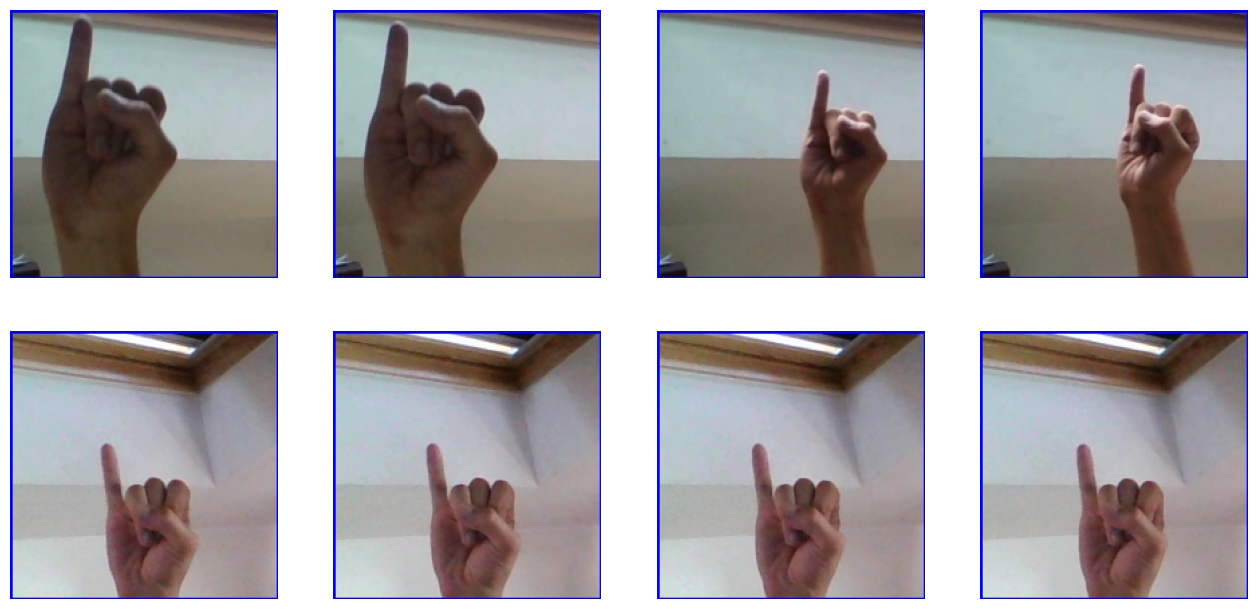

Image of alphabet I


In [23]:
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_col = random.choice(list(dataset.columns))
random_image_path = [i for i in list(dataset.loc[:7, random_col])]

nrows = 4
ncols = 4


pic_index = 0

#setup matplotlib fig and size it to fit 4x4 img
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(random_image_path):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') #disable grid lines
    
    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()
print('Image of alphabet ' + random_col)

In [24]:
file_list = {}

target_success = 30000
data = dataset

for idx in data:
    file_list[idx] = data[idx].values

In [25]:
landmarks = ['class']
for val in range(1, 22):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
    landmarks += ['x{}'.format(val), 'y{}'.format(val)]
    
with open('hand_dataset.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [26]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [27]:
with mp_hands.Hands( static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        
    for idx, files in file_list.items():
        success = 0
        
        for file in files : 
            # Read an image, flip it around y-axis for correct handedness output (see
            # above).
            image = cv2.flip(cv2.imread(file), 1)
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
            if success < target_success:
                try :
                    # Extract Hand landmarks

                    for hand_landmark in results.multi_hand_landmarks:
                        right_hand = hand_landmark.landmark

#                     right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in right_hand]).flatten())
                    right_hand_row = list(np.array([[landmark.x, landmark.y] for landmark in right_hand]).flatten())

                    # Concate rows
                    row = right_hand_row

                    # Append class name 
                    row.insert(0, file.split('\\')[2])

                    # Export to CSV
                    with open('hand_dataset.csv', mode='a', newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(row) 
                        
                    success += 1
                    
                except :
                    pass

                print('Handedness:', results.multi_handedness)
                if not results.multi_hand_landmarks:
                    continue
                image_height, image_width, _ = image.shape
                annotated_image = image.copy()
                for hand_landmarks in results.multi_hand_landmarks:
                    print('hand_landmarks:', hand_landmarks)
                    print(
                        f'Index finger tip coordinates: (',
                        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
                    )
                    mp_drawing.draw_landmarks(
                        annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                if not os.path.exists('tmp'):
                    os.mkdir('./tmp')

                cv2.imwrite('./tmp/' + file.split('\\')[2] + str(idx) + '.png', cv2.flip(annotated_image, 1))
            else :
                break

Handedness: [classification {
  index: 1
  score: 0.97019577
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.530803204
  y: 0.581162751
  z: -1.47234573e-006
}
landmark {
  x: 0.4139902
  y: 0.501149
  z: -0.0180731919
}
landmark {
  x: 0.35540688
  y: 0.369223297
  z: -0.0296565909
}
landmark {
  x: 0.345517397
  y: 0.263534337
  z: -0.0454544537
}
landmark {
  x: 0.354250491
  y: 0.179080322
  z: -0.0567713417
}
landmark {
  x: 0.437133878
  y: 0.268820882
  z: -0.00775238406
}
landmark {
  x: 0.405874908
  y: 0.217993706
  z: -0.0636742115
}
landmark {
  x: 0.39607352
  y: 0.319360286
  z: -0.0952865
}
landmark {
  x: 0.398461193
  y: 0.401952624
  z: -0.105944246
}
landmark {
  x: 0.51644361
  y: 0.279808521
  z: -0.0196766853
}
landmark {
  x: 0.472435981
  y: 0.248213291
  z: -0.0811140239
}
landmark {
  x: 0.463823467
  y: 0.361222118
  z: -0.0961176753
}
landmark {
  x: 0.471820205
  y: 0.447500557
  z: -0.0899965316
}
landmark {
  x: 0.592641
  y: 0.304209948
  z: -0.03

c:\Users\NAME\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Handedness: [classification {
  index: 1
  score: 0.991538405
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.289090782
  y: 0.751779
  z: -1.79528331e-006
}
landmark {
  x: 0.167961836
  y: 0.654705286
  z: -0.0302666966
}
landmark {
  x: 0.1000067
  y: 0.499484807
  z: -0.0485886708
}
landmark {
  x: 0.0951074958
  y: 0.371244311
  z: -0.0724385232
}
landmark {
  x: 0.122449428
  y: 0.26761
  z: -0.0891449526
}
landmark {
  x: 0.216963455
  y: 0.378142416
  z: 0.00646641757
}
landmark {
  x: 0.182082489
  y: 0.306183636
  z: -0.0653401837
}
landmark {
  x: 0.168105766
  y: 0.414516121
  z: -0.110875078
}
landmark {
  x: 0.166184485
  y: 0.507990956
  z: -0.129019693
}
landmark {
  x: 0.301417947
  y: 0.396588415
  z: -0.0072731995
}
landmark {
  x: 0.254239917
  y: 0.342441678
  z: -0.0870325267
}
landmark {
  x: 0.23803018
  y: 0.476651579
  z: -0.111108154
}
landmark {
  x: 0.23280707
  y: 0.581608176
  z: -0.105807386
}
landmark {
  x: 0.381068289
  y: 0.431430757
  z: -0.0

KeyboardInterrupt: 